# Pandas 篩選文字欄位資料

In [7]:
import pandas as pd

columns = ['姓名', '班級']
data = [['林大和','一年甲班'], ['張小明','一年乙班'], ['林美麗','一年乙班'],
        ['鄭中林','二年甲班'], ['林品朋','二年甲班'], ['陳明朋','二年乙班']]
df = pd.DataFrame(data, columns=columns)
df

,姓名,班級
0,林大和,一年甲班
1,張小明,一年乙班
2,林美麗,一年乙班
3,鄭中林,二年甲班
4,林品朋,二年甲班
5,陳明朋,二年乙班


In [8]:
# 精確比對篩選
df1 = df[df['班級']=='二年甲班']
df1

,姓名,班級
3,鄭中林,二年甲班
4,林品朋,二年甲班


In [9]:
# 模糊比對篩選
df2 = df[df['姓名'].str.contains('林')]
df2

,姓名,班級
0,林大和,一年甲班
2,林美麗,一年乙班
3,鄭中林,二年甲班
4,林品朋,二年甲班


In [10]:
# 多重條件篩選
df3 = df[(df['姓名'].str.contains('林')) & \
         (df['班級'].str.contains('一年'))]
df3

,姓名,班級
0,林大和,一年甲班
2,林美麗,一年乙班


# 擷取電腦相關行業職缺資料

In [11]:
import requests, math
from bs4 import BeautifulSoup
import pandas as pd

df = []
baseurl = 'https://www.1111.com.tw/search/job?ks=電腦&page='  #電腦

#取得總資料數
html = requests.get(baseurl + '1')
soup = BeautifulSoup(html.text, 'lxml')
tem = soup.find('div', class_='srh-result-count nav_item job_count')
jobn = int(tem.get('data-count').replace(',', ''))
if jobn > 1500:  #最多取1500筆資料
    jobn = 1500
page = math.ceil(jobn/20)
# 逐頁讀取資料
for i in range(page):
    url = baseurl + str(i+1)
    html = requests.get(url)
    soup = BeautifulSoup(html.text, 'lxml')
    job = soup.find_all('div', class_='body-wrapper')
    if (i+1)*20 > jobn:
        count = jobn - i*20
    else:
        count = 20
    for j in range(count):
        try:
            jobinfo = job[j].find('div', class_='job_item_info')
            work = jobinfo.find('h5').text  #職務名稱
            site = jobinfo.find('a').get('href')  #工作網址
            title = jobinfo.find('div', class_='card-subtitle mb-4 text-muted happiness-hidd').find('a').get('title')
            tlist = title.split('\n')
            company = tlist[0].replace('《公司名稱》', '')  #公司名稱
            companysort = tlist[1].replace('《行業類別》', '')  #公司類別
            area = tlist[2].replace('《公司住址》', '')  #工作地點
            salary = jobinfo.find('div', class_='job_item_detail_salary ml-3 font-weight-style digit_6').text  #薪資
            person = jobinfo.find('span', class_='applicants_data').text  #應徵人數
            content = jobinfo.find('p', class_='card-text job_item_description body_4').text  #其他事項
            dfmono = pd.DataFrame([{'職務名稱':work,
                                  '工作網址': site,
                                  '公司名稱': company,
                                  '公司類別': companysort,
                                  '工作地點':area,
                                  '薪資':salary,
                                  '應徵人數':person,
                                  '其他事項':content }],
                                  )
            df.append(dfmono)
        except:
            pass
    print('處理第 ' + str(i+1) + ' 頁完畢！')
df = pd.concat(df, ignore_index=True)
df.to_excel('1111data.xlsx', index=0)  #存為excel檔

處理第 1 頁完畢！
處理第 2 頁完畢！
處理第 3 頁完畢！
處理第 4 頁完畢！
處理第 5 頁完畢！
處理第 6 頁完畢！
處理第 7 頁完畢！
處理第 8 頁完畢！
處理第 9 頁完畢！
處理第 10 頁完畢！
處理第 11 頁完畢！
處理第 12 頁完畢！
處理第 13 頁完畢！
處理第 14 頁完畢！
處理第 15 頁完畢！
處理第 16 頁完畢！
處理第 17 頁完畢！
處理第 18 頁完畢！
處理第 19 頁完畢！
處理第 20 頁完畢！
處理第 21 頁完畢！
處理第 22 頁完畢！
處理第 23 頁完畢！
處理第 24 頁完畢！
處理第 25 頁完畢！
處理第 26 頁完畢！
處理第 27 頁完畢！
處理第 28 頁完畢！
處理第 29 頁完畢！
處理第 30 頁完畢！
處理第 31 頁完畢！
處理第 32 頁完畢！
處理第 33 頁完畢！
處理第 34 頁完畢！
處理第 35 頁完畢！
處理第 36 頁完畢！
處理第 37 頁完畢！
處理第 38 頁完畢！
處理第 39 頁完畢！
處理第 40 頁完畢！
處理第 41 頁完畢！
處理第 42 頁完畢！
處理第 43 頁完畢！
處理第 44 頁完畢！
處理第 45 頁完畢！
處理第 46 頁完畢！
處理第 47 頁完畢！
處理第 48 頁完畢！
處理第 49 頁完畢！
處理第 50 頁完畢！
處理第 51 頁完畢！
處理第 52 頁完畢！
處理第 53 頁完畢！
處理第 54 頁完畢！
處理第 55 頁完畢！
處理第 56 頁完畢！
處理第 57 頁完畢！
處理第 58 頁完畢！
處理第 59 頁完畢！
處理第 60 頁完畢！
處理第 61 頁完畢！
處理第 62 頁完畢！
處理第 63 頁完畢！
處理第 64 頁完畢！
處理第 65 頁完畢！
處理第 66 頁完畢！
處理第 67 頁完畢！
處理第 68 頁完畢！
處理第 69 頁完畢！
處理第 70 頁完畢！
處理第 71 頁完畢！
處理第 72 頁完畢！
處理第 73 頁完畢！
處理第 74 頁完畢！
處理第 75 頁完畢！


# 統計六都職缺數量分布

In [12]:
# 取得字串中所有數值
import re
list1 = re.findall(r"\d+\.?\d*", "共有20人")
print('list1:', list1)
list2 = re.findall(r"\d+\.?\d*", "共有20~30人")
print('list2:', list2)

list1: ['20']
list2: ['20', '30']


In [13]:
# 下載翰字鑄造-台北黑體
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2022-08-13 08:17:14--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.217.193.138, 172.217.193.102, 172.217.193.139, ...
Connecting to drive.google.com (drive.google.com)|172.217.193.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7f8s7sdcgpae8tfv9mkrne1p6ljjetlj/1660378575000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=b7ce7cf1-f2c9-49fe-a059-8bcc538762a6 [following]
--2022-08-13 08:17:15--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7f8s7sdcgpae8tfv9mkrne1p6ljjetlj/1660378575000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=b7ce7cf1-f2c9-49fe-a059-8bcc538762a6
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 108.177.12.132, 2607:f8b0:400c:c32::84
Connecting to do

台北    1189
新北    1333
桃園     832
台中     218
台南      64
高雄     439
dtype: int64


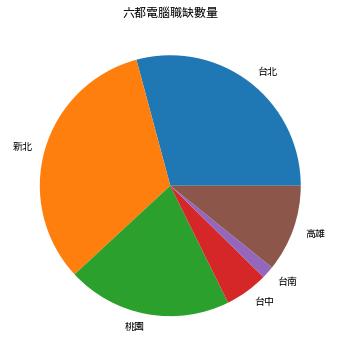

In [14]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.font_manager import fontManager

# 加入中文字型設定：翰字鑄造-台北黑體
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

df = pd.read_excel('1111data.xlsx')
city = ['台北', '新北', '桃園', '台中', '台南', '高雄']  #六都
citycount = []  #存六都工作職缺數量的串列
for i in range(len(city)):
    df1 = df[df['工作地點'].str.contains(city[i])]  #取出包含指定地點的資料
    indexlist = df1.index  #取得資料索引
    total = 0  #職缺總額
    for j in range(len(df1)):
        personnum = re.findall(r"\d+\.?\d*",df1['應徵人數'][indexlist[j]])  #取出資料中的數值
        if len(personnum) == 1:  #若是1個數值即為人數
            person = int(personnum[0])
        else:  #若是2個數值則取平均數
            person =int((int(personnum[0])+int(personnum[1]))/2)
        total += person
    citycount.append(total)

ser = pd.Series(citycount, index=city)  #串列轉Series
print(ser)
plt.axis('off')
ser.plot(kind='pie', title='六都電腦職缺數量', figsize=(6, 6))  #繪製圓餅圖

# 統計六都平均薪資金額

台北    35520
新北    38436
桃園    37451
台中    34327
台南    31309
高雄    30458
dtype: int64


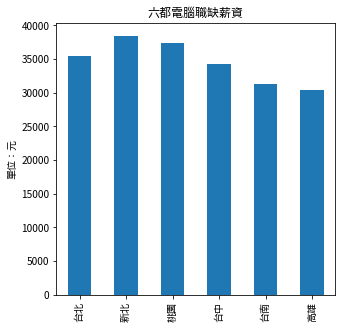

In [15]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.font_manager import fontManager

def transfer(strSalary):  #轉換薪資為月薪，單位為「元」
    sal = float(strSalary)
    if sal < 20:  #薪資單位為「萬」
        sal = sal * 10000
    elif sal <300:  #日薪
        sal = sal * 8 * 22
    return sal

# 加入中文字型設定：翰字鑄造-台北黑體
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

df = pd.read_excel('1111data.xlsx')
city = ['台北', '新北', '桃園', '台中', '台南', '高雄']  #六都
salarylist = []
for i in range(len(city)):
    df1 = df[(df['工作地點'].str.contains(city[i]))]
    indexlist = df1.index  #取得資料索引
    total = 0  #薪資總額
    for j in range(len(df1)):
        salarytem = df1['薪資'][indexlist[j]].replace(',', '')  #以資料索引取得資料
        salanum = re.findall(r"\d+\.?\d*",salarytem)  #取出資料中的數值
        if len(salanum) == 1:  #若是1個數值即為薪資
            salary = transfer(salanum[0])
        else:  #若是2個數值則取平均數
            salary = (transfer(salanum[0])+transfer(salanum[1]))/2
        total += salary
    salarycity = int(total/len(df1))  #平均薪資
    salarylist.append(salarycity)

ser = pd.Series(salarylist, index=city)  #串列轉Series
print(ser)
plt.ylabel('單位：元')
ser.plot(kind='bar', title='六都電腦職缺薪資', figsize=(5, 5))  #繪製長條圖